E-commerce sector joyeria

Proyecto de analisis de datos con Python, Pandas, Matplotlib, Seaborn

Realizare un analisis exploratorio de los datos (EDA) y un forecasting para predecir futuros comportamientos de los clientes.

El csv se extrajo de Kaggle.com, plataforma con miles de datasets para practicar.
https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-jewelry-store/data

Primero debemos importar las librerias que usemos y el dataset o dataframe, yo me referire al conjunto de datos como dataframe (df)

In [22]:
#Importamos los modulos necesarios
import pandas as pd #Para el procesado de datos, archivo csv en este caso
import numpy as np #algebra
import matplotlib.pyplot as plt #Creacion de graficas
import seaborn as sns #Graficas

archivo_csv = "jewelry.csv"

df = pd.read_csv(archivo_csv)

Una vez hemos cargado con exito el archivo empezamos el analis exploratorio, una pregunta basica, que tamaño tiene el archivo?
Cuantas filas y columnas?

In [23]:
#La manera mas facil para verlo es con el atributo shape de pandas.
#Este solo nos mostrar los numero, de filas y columnas en ese orden.
print(df.shape)
#Una manera un poco mas elaborada de dar la informacion.
num_filas, num_columns = df.shape
# Mostrar el número de filas y columnas
print(f"El DataFrame tiene {num_filas} filas y {num_columns} columnas.")

(95910, 13)
El DataFrame tiene 95910 filas y 13 columnas.


El siguiente paso sera ver el nombre de las columnas y unas cuantas filas, se suele usar las 5 primeras filas.


In [24]:
print("\nPrimeras filas del DataFrame:")
print()
print(df.head())


Primeras filas del DataFrame:

   2018-12-01 11:40:29 UTC  1924719191579951782  1842195256808833386  1  \
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446  1   
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556  1   
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453  1   
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865  1   
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449  1   

   1806829201890738522   jewelry.earring    0  561.51  1515915625207851155  \
0         1.806829e+18               NaN  NaN  212.14         1.515916e+18   
1         1.806829e+18   jewelry.pendant  1.0   54.66         1.515916e+18   
2         1.806829e+18   jewelry.pendant  0.0   88.90         1.515916e+18   
3         1.806829e+18  jewelry.necklace  0.0  417.67         1.515916e+18   
4         1.806829e+18   jewelry.earring  1.0  102.27         1.515916e+18   

  Unnamed: 9     red  gold   diamond  
0        

No queda claro que es cada columna y que representa, asi que analizemos los nombres de las columnas


In [27]:
print("Columnas del DataFrame:")
for i, columna in enumerate(df.columns, 1):
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. 2018-12-01 11:40:29 UTC
2. 1924719191579951782
3. 1842195256808833386
4. 1
5. 1806829201890738522
6. jewelry.earring
7. 0
8. 561.51
9. 1515915625207851155
10. Unnamed: 9
11. red
12. gold
13. diamond


Asignamos nombres mas humanos a las columnas y volvemos a ver la cabereza del df

In [28]:
print("Renombramos las columnas por motivos de legibilidad")
# Renombrar y reordenar las columnas
df = df.rename(columns={
    '2018-12-01 11:40:29 UTC': 'Order_Datetime',
    '1924719191579951782': 'Order_ID',
    '1842195256808833386': 'Product_ID',
    '1': 'Quantity',
    '1806829201890738522': 'Category_ID',
    'jewelry.earring': 'Category_Alias',
    '0': 'Brand_ID',
    '561.51': 'Price_USD',
    '1515915625207851155': 'User_ID',
    'Unnamed: 9': 'Gender',
    'red': 'Main_Color',
    'gold': 'Main_Metal',
    'diamond': 'Main_Gem'
})

# Reordenar las columnas
column_order = ['Order_Datetime', 'Order_ID', 'Product_ID', 'Quantity', 'Category_ID', 'Category_Alias', 'Brand_ID', 'Price_USD', 'User_ID', 'Gender', 'Main_Color', 'Main_Metal', 'Main_Gem']
df = df[column_order]

print("\nComprobamos los cambios en las columnas")
print(df.columns)

Renombramos las columnas por motivos de legibilidad

Comprobamos los cambios en las columnas
Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'Quantity', 'Category_ID',
       'Category_Alias', 'Brand_ID', 'Price_USD', 'User_ID', 'Gender',
       'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')


In [29]:
print("Columnas del DataFrame:")
for i, columna in enumerate(df.columns, 1): #Este numero 1, indica que el indice empieze en 1 y no en 0 por la funcion enumerate
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. Order_Datetime
2. Order_ID
3. Product_ID
4. Quantity
5. Category_ID
6. Category_Alias
7. Brand_ID
8. Price_USD
9. User_ID
10. Gender
11. Main_Color
12. Main_Metal
13. Main_Gem


Mucho mejor, ya que podemos ver de manera clara que representa cada dato en la fila y columna.

In [30]:

print(df.head().to_string())

            Order_Datetime             Order_ID           Product_ID  Quantity   Category_ID    Category_Alias  Brand_ID  Price_USD       User_ID Gender Main_Color Main_Metal  Main_Gem
0  2018-12-01 17:38:31 UTC  1924899396621697920  1806829193678291446         1  1.806829e+18               NaN       NaN     212.14  1.515916e+18    NaN     yellow       gold       NaN
1  2018-12-02 13:53:42 UTC  1925511016616034733  1842214461889315556         1  1.806829e+18   jewelry.pendant       1.0      54.66  1.515916e+18      f      white       gold  sapphire
2  2018-12-02 17:44:02 UTC  1925626951238681511  1835566849434059453         1  1.806829e+18   jewelry.pendant       0.0      88.90  1.515916e+18      f        red       gold   diamond
3  2018-12-02 21:30:19 UTC  1925740842841014667  1873936840742928865         1  1.806829e+18  jewelry.necklace       0.0     417.67  1.515916e+18    NaN        red       gold  amethyst
4  2018-12-02 22:09:34 UTC  1925760595336888995  1835566854827934449       

In [31]:
df.info()
print("\nMostramos el shape del df")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   Quantity        95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category_Alias  85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Gender          47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB

Mostramos el shape del df
(95910, 13)


La columna Quantity siempre tiene el valor uno, por lo que la eliminamos

In [32]:
#Borrando la columna Quantity del df.
df.drop('Quantity', axis=1, inplace=True)

#Comprobamos que la columna Quantity no aparece en el listado de columnas
print("Columnas del DataFrame:")
for i, columna in enumerate(df.columns, 1): 
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. Order_Datetime
2. Order_ID
3. Product_ID
4. Category_ID
5. Category_Alias
6. Brand_ID
7. Price_USD
8. User_ID
9. Gender
10. Main_Color
11. Main_Metal
12. Main_Gem


Vamos a ver cuantas categorias hay dentro de la columna "Category_Alias"

In [33]:
categorias = df['Category_Alias'].unique()
print("\nCategorias")
print()
print(categorias)


Categorias

[nan 'jewelry.pendant' 'jewelry.necklace' 'jewelry.earring' 'jewelry.ring'
 'jewelry.brooch' 'jewelry.bracelet' 'electronics.clocks'
 'jewelry.souvenir' '230.12' '202.36' '1098.03' '321.78' '1128.62' '81.27'
 '34.25' '582.16' '227.37' '234.22' '150.55' '131.82' '2123.15' '109.45'
 '49.22' '472.47' '205.38' '2746.44' '51.08' '231.12' '76.97' '3054.73'
 '184.90' '380.10' '357.49' '15.47' '135.33' '719.75' '93.01' '177.95'
 'jewelry.stud' '102.10' '595.75' '469.56' '427.07' '53.62' '77.53'
 '1469.18' '355.27' '184.89' '154.66' '300.58' '83.73' '271.19' '3294.21'
 '278.04' '3626.26' '126.03' '283.52' '114.38' '89.04' '8.22' '124.88'
 '89.73' '171.23' '136.93' '19.04' '158.77' '187.10' '151.92' '1845.89'
 '87.23' '248.58' '596.48' '208.88' '193.11' '169.84' '1447.68' '45.07'
 '136.85' '282.05' '61.51' '210.21' '137.12' '147.81' '419.45' '825.27'
 '300.16' '541.78' '308.74' '766.85' '410.82' '101.23' '2.88' '1356.16'
 '13.42' '35.21' '134.79' '626.58' '13.70' '108.53' '119.01' '

Vemos como los valores que puede adaptar la columna categoria son demasiados, vamos a contarlos por que intuyo que algo esta mal.

In [52]:
recuento_val = df['Category_Alias'].value_counts()

print(recuento_val)

Category_Alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64


Nos da una longitud de 218 elementos, y solo los que son caracteres estan bien, seguimos limpiando los datos.


In [55]:
# Filtrar las categorías válidas, tienen que ser cadenas de texto.
df = df[~df['Category_Alias'].astype(str).str.isnumeric()]

print(recuento_val)
print(df['Category_Alias'].apply(type))

Category_Alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64
0        <class 'float'>
1          <class 'str'>
2          <class 'str'>
3          <class 'str'>
4          <class 'str'>
              ...       
95905      <class 'str'>
95906    <class 'float'>
95907      <class 'str'>
95908      <class 'str'>
95909      <class 'str'>
Name: Category_Alias, Length: 95910, dtype: object


In [45]:
recuento_valores = df['Category_Alias'].value_counts()
print(recuento_valores)

Category_Alias
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64


In [46]:
# Comprobamos el tipo de datos de la columna 'Category_Alias'
tipo_de_datos = df['Category_Alias'].dtype

# Mostramos el tipo de datos
print("Tipo de datos de la columna 'Category_Alias':", tipo_de_datos)


Tipo de datos de la columna 'Category_Alias': object


VISUALIZACION DE LOS DATOS CON MATPLOTLIB Y SEABORN

In [40]:
# Obtener el número de categorías únicas
num_categorias_diferentes = df['Category_Alias'].nunique()

# Mostrar el resultado
print("Número de categorías diferentes:", num_categorias_diferentes)


Número de categorías diferentes: 218


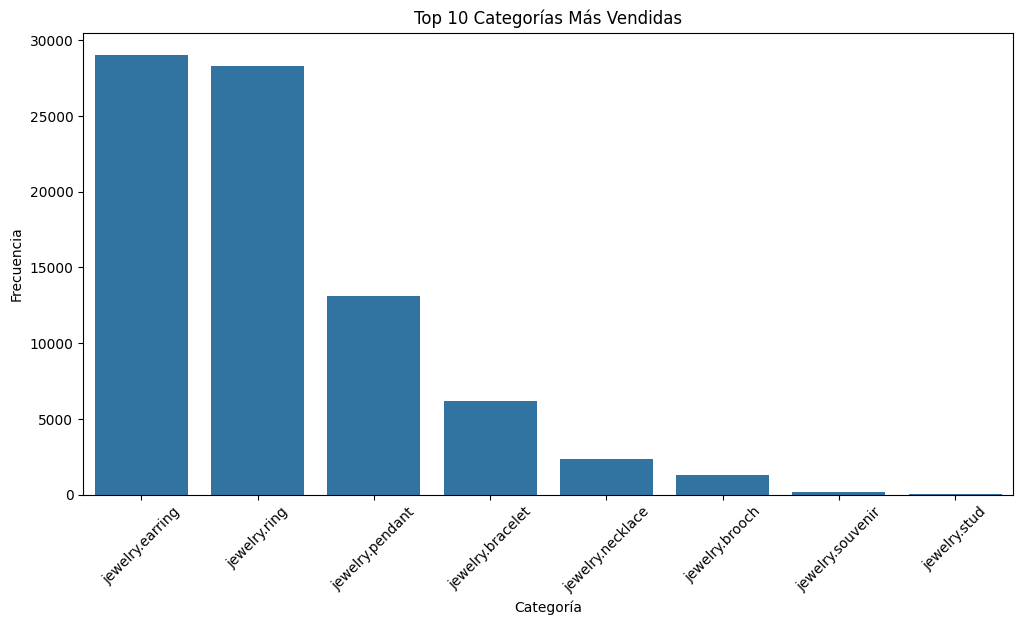

In [ ]:
# Seleccionar las 10 categorías más usadas
top_10_categorias = frecuencia_categorias_validas.head(10)

# Graficar la frecuencia de las 10 categorías más usadas utilizando seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categorias.index, y=top_10_categorias.values)
plt.title('Top 10 Categorías Más Vendidas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()


Quiero ver con mejor perspectiva las 3 categorias menos vendidas

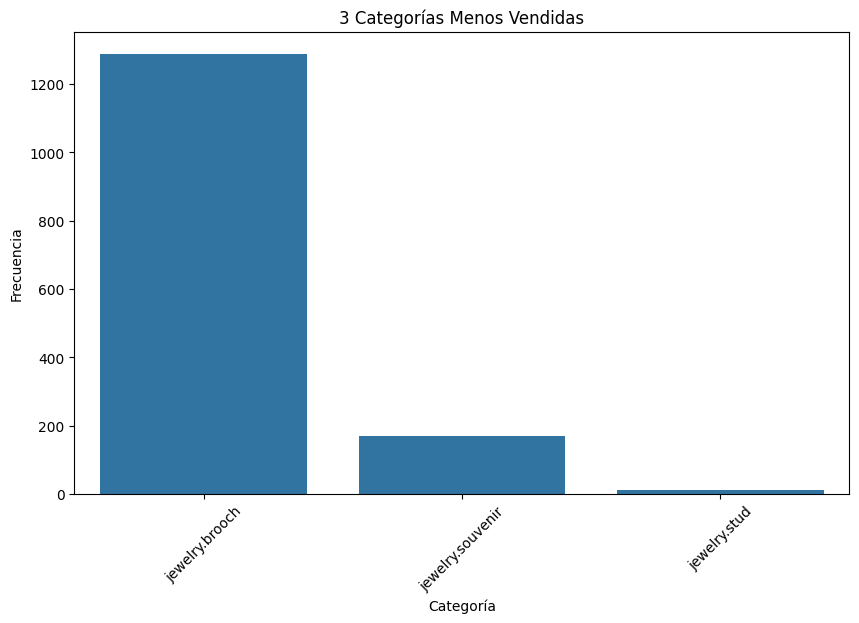

In [ ]:

# Obtener la frecuencia de cada categoría
frecuencia_categorias = df_valid_categories['Category_Alias'].value_counts()

# Obtener las 3 categorías menos vendidas
categorias_menos_vendidas = frecuencia_categorias.tail(3)

# Graficar la frecuencia de las 3 categorías menos vendidas utilizando seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=categorias_menos_vendidas.index, y=categorias_menos_vendidas.values)
plt.title('3 Categorías Menos Vendidas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()


Hasta aqui hemos hecho: 
    1º -Cargar el documento
    2º -Importar todos los modulos necesarios para la carga del documento y el analisis exploratorio
    3º -Hemos analizado las categorias mas vendidas, y las 3 menos vendidas.
    

Valvamos a ver las columnas del df a ver que mas podemos ver.

In [57]:
print("Columnas del DataFrame:")
for i, columna in enumerate(df.columns, 1): 
    print(f"{i}. {columna}")

Columnas del DataFrame:
1. Order_Datetime
2. Order_ID
3. Product_ID
4. Category_ID
5. Category_Alias
6. Brand_ID
7. Price_USD
8. User_ID
9. Gender
10. Main_Color
11. Main_Metal
12. Main_Gem


Me interesa analizar un poco las ventas por colores o metales
Profundicemos en los colores

In [ ]:
categorias_color = df['Main_Color'].unique()
print("\nCategorias")
print()
print(categorias_color)



Categorias

['yellow' 'white' 'red' 'black']


Vamos a eliminar las filas en las que el color es 'unknow color'

In [ ]:
df = df.dropna(subset=['Main_Color'])

df = df[~df['Main_Color'].isin(['unknown-color'])]
print(categorias_color)

print("\nDataFrame después de la eliminación:")
print(df)

categorias_color = df['Main_Color'].unique()
print(categorias_color)

['yellow' 'white' 'red' 'black']

DataFrame después de la eliminación:
  Main_Color
0     yellow
1      white
2        red
3     yellow
4      black
5      white
6        red
7        red
['yellow' 'white' 'red' 'black']


Text(0.5, 1.0, 'Ventas por colores')

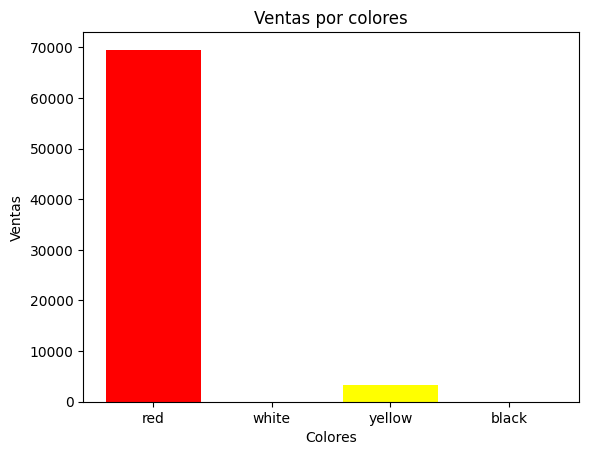

In [ ]:
#Calculamos la frencuencia de cada color
frecuencia_colores = df['Main_Color'].value_counts()
plt.bar(frecuencia_colores.index, frecuencia_colores.values, color=frecuencia_colores.index)
#Añadimos etiquetas y titulo
plt.xlabel('Colores')
plt.ylabel('Ventas')
plt.title('Ventas por colores')



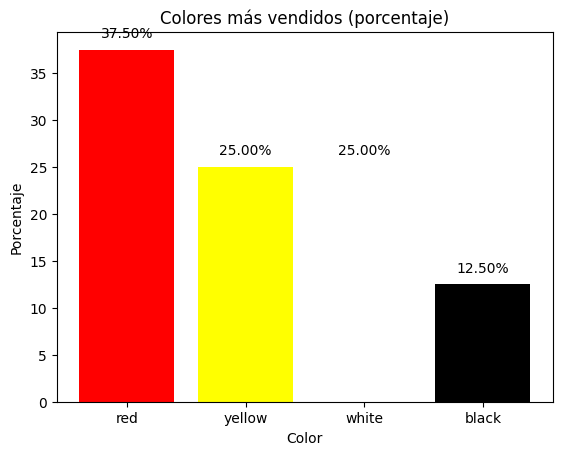

In [ ]:

# Calcular la frecuencia de cada color
frecuencia_colores = df['Main_Color'].value_counts()

# Calcular los porcentajes
porcentajes_colores = frecuencia_colores / len(df) * 100

# Crear un gráfico de barras
plt.bar(porcentajes_colores.index, porcentajes_colores.values, color=porcentajes_colores.index)

# Agregar etiquetas y título
plt.xlabel('Color')
plt.ylabel('Porcentaje')
plt.title('Colores más vendidos (porcentaje)')

# Mostrar los porcentajes en las barras
for i, valor in enumerate(porcentajes_colores.values):
    plt.text(i, valor + 1, f'{valor:.2f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


Main_Color
red       3
yellow    2
white     2
black     1
Name: count, dtype: int64


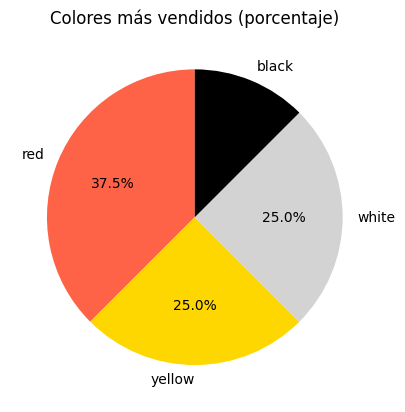

In [ ]:

#Okee
# Calcular la frecuencia de cada color
frecuencia_colores = df['Main_Color'].value_counts()
print(frecuencia_colores)

# Crear un gráfico de pastel
plt.pie(frecuencia_colores, labels=frecuencia_colores.index, autopct='%1.1f%%', startangle=90, colors=[colores[color] for color in frecuencia_colores.index])
colores = {'yellow': 'gold', 'white': 'lightgray', 'red': 'tomato', 'black': 'black'}
# Agregar título)

# Agregar título
plt.title('Colores más vendidos (porcentaje)')

# Mostrar el gráfico
plt.show()


In [59]:
columnas = df.columns
print(columnas)

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'Category_ID',
       'Category_Alias', 'Brand_ID', 'Price_USD', 'User_ID', 'Gender',
       'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')
